# Image Classifier

---

1. Descargar el Dataset:

Visita Kaggle y descarga el dataset de perros y gatos.
Descomprime el dataset si es necesario y organiza las carpetas (train/test).

2. Exploración del Dataset:

Usa Python para listar imágenes y verificar si los datos están balanceados.

3. Preprocesamiento de Datos:

Redimensionar imágenes.
Normalizar valores (0-1).
Dividir en entrenamiento y validación (si no están separados).

4. Preparación del Data Loader:

Utiliza librerías como TensorFlow o PyTorch para cargar las imágenes.
Usa ImageDataGenerator en TensorFlow o ImageFolder en PyTorch.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training')

5. Crear el Modelo de Deep Learning:

Usa una red simple como CNN o transfer learning con modelos pre-entrenados como ResNet o MobileNet.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

6. Compilar el Modelo:

Define la función de pérdida, optimizador y métricas.

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

7. Entrenar el Modelo:

Ajusta los hiperparámetros como épocas y tamaño de lote.

history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

8. Evaluar el Modelo:

Evalúa en el conjunto de prueba (test).

loss, accuracy = model.evaluate(test_generator)
print(f"Accuracy: {accuracy*100:.2f}%")


9. Ajuste y Mejora:

Experimenta con:
Aumentación de datos.
Más capas o unidades.
Transfer learning para mejorar la precisión.

In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array
from PIL import Image

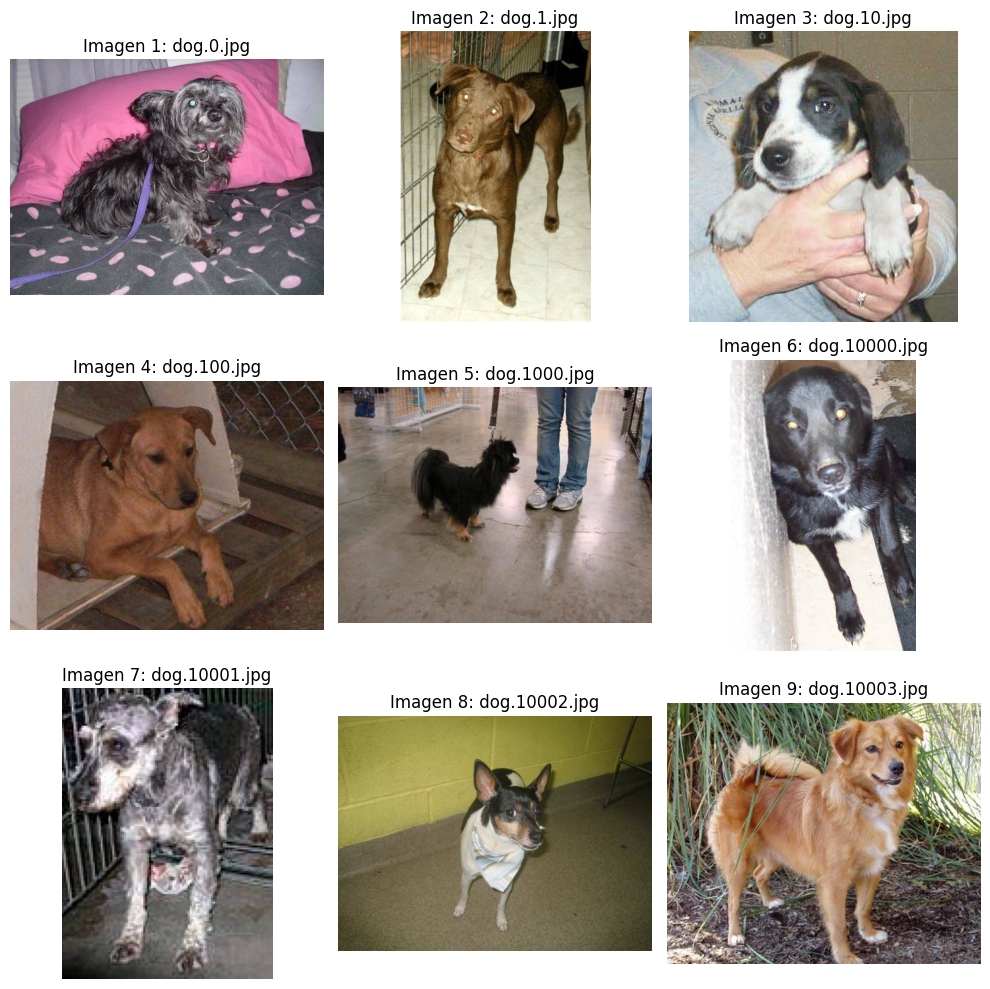

In [12]:
def cargar_y_mostrar_dogs(carpeta, num_imagenes=9):
    """
    Carga e imprime las primeras 'num_imagenes' imágenes de perros en una cuadrícula 3x3.
    
    Args:
        carpeta (str): Ruta de la carpeta que contiene las imágenes.
        num_imagenes (int): Número de imágenes a mostrar (por defecto 9).
    """
    # Filtrar imágenes de perros
    imagenes_perros = [archivo for archivo in os.listdir(carpeta) if "dog" in archivo.lower()]
    
    # Limitar a las primeras 'num_imagenes' imágenes
    imagenes_perros = imagenes_perros[:num_imagenes]
    
    # Configurar la figura
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    axes = axes.flatten()  # Convertir la matriz de ejes en una lista para iterar fácilmente
    
    for i, archivo in enumerate(imagenes_perros):
        ruta_imagen = os.path.join(carpeta, archivo)
        img = Image.open(ruta_imagen)
        
        axes[i].imshow(img)
        axes[i].set_title(f"Imagen {i+1}: {archivo}")
        axes[i].axis('off')  # Eliminar los ejes
    
    plt.tight_layout()
    plt.show()

# Ruta de la carpeta con las imágenes
ruta_carpeta = "../data/raw/train"
cargar_y_mostrar_dogs(ruta_carpeta)

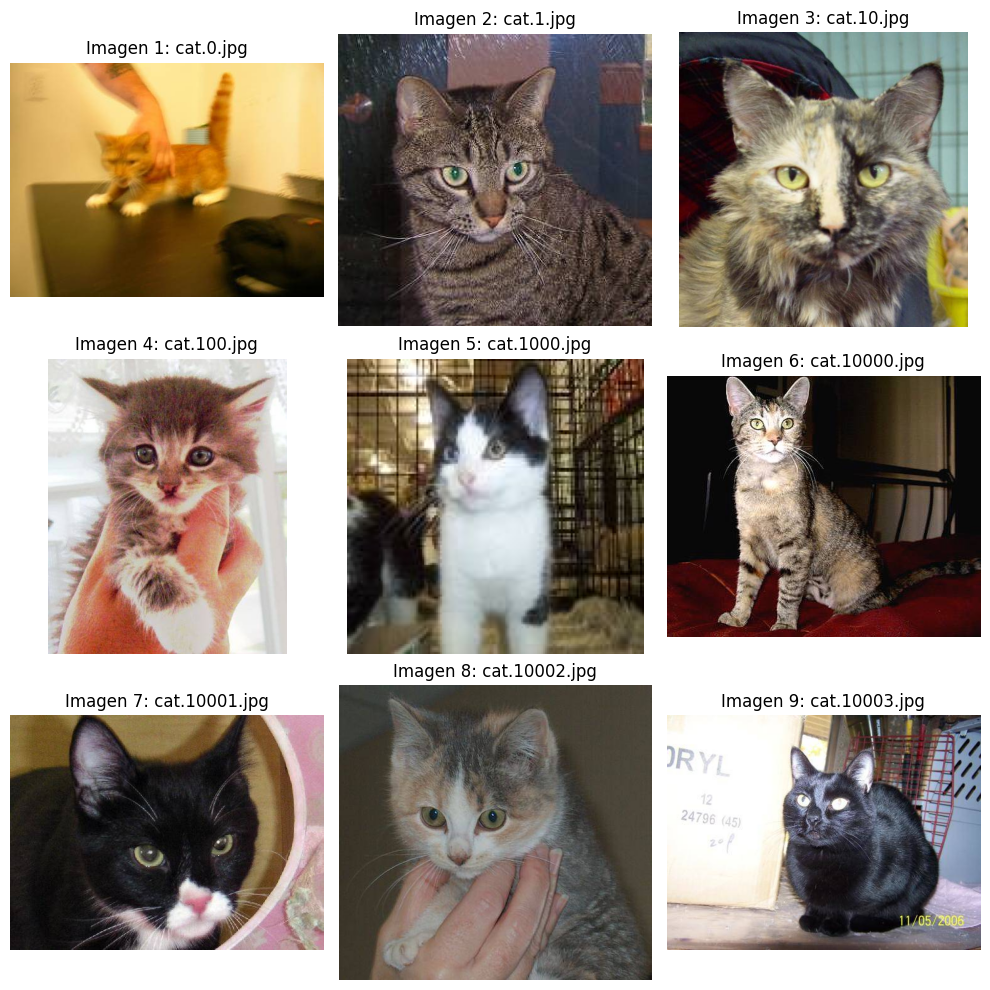

In [14]:
def cargar_y_mostrar_cats(carpeta, num_imagenes=9):
    """
    Carga e imprime las primeras 'num_imagenes' imágenes de perros en una cuadrícula 3x3.
    
    Args:
        carpeta (str): Ruta de la carpeta que contiene las imágenes.
        num_imagenes (int): Número de imágenes a mostrar (por defecto 9).
    """
    # Filtrar imágenes de perros
    imagenes_gatos = [archivo for archivo in os.listdir(carpeta) if "cat" in archivo.lower()]
    
    # Limitar a las primeras 'num_imagenes' imágenes
    imagenes_gatos = imagenes_gatos[:num_imagenes]
    
    # Configurar la figura
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    axes = axes.flatten()  # Convertir la matriz de ejes en una lista para iterar fácilmente
    
    for i, archivo in enumerate(imagenes_gatos):
        ruta_imagen = os.path.join(carpeta, archivo)
        img = Image.open(ruta_imagen)
        
        axes[i].imshow(img)
        axes[i].set_title(f"Imagen {i+1}: {archivo}")
        axes[i].axis('off')  # Eliminar los ejes
    
    plt.tight_layout()
    plt.show()

# Ruta de la carpeta con las imágenes
ruta_carpeta = "../data/raw/train"
cargar_y_mostrar_cats(ruta_carpeta)

---

In [4]:
# os.listdir(carpeta): Lista todos los archivos en la carpeta especificada.
# os.path.join(carpeta, archivo): Construye la ruta completa del archivo.
# os.path.isfile(ruta_archivo): Verifica que el elemento sea un archivo (y no una subcarpeta).

def clasificar(carpeta):

    lista_gatos = []
    lista_perros = []

    for archivo in os.listdir(carpeta):

        ruta_archivo = os.path.join(carpeta, archivo)

        if os.path.isfile(ruta_archivo):
            # Clasificar según el nombre del archivo
            if "cat" in archivo.lower():
                lista_gatos.append(ruta_archivo)
            elif "dog" in archivo.lower():
                lista_perros.append(ruta_archivo)

    return lista_gatos, lista_perros

In [11]:
print(f"Total imágenes de entrenamiento: {len(os.listdir('../data/raw/train'))}")
print(f"Total imágenes de entrenamiento: {len(os.listdir('../data/raw/test1'))}")

Total imágenes de entrenamiento: 25000
Total imágenes de entrenamiento: 12500


In [7]:
carpeta_train = "../data/raw/train"

In [8]:
gatos_train, perros_train = clasificar(carpeta_train)

In [8]:
len(gatos_train)

12500

---

In [17]:
from keras.preprocessing.image import ImageDataGenerator

# Definir algunas reglas para DataGen
train_dir = "../data/raw/train"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Generación de datos de entrenamiento
train_data = datagentrain.flow_from_directory(
    "../data/raw/train",
    target_size = image_size,
    classes = ["dog", "cat"] 
)

# Generación de datos de prueba
test_data = datagentest.flow_from_directory(
    "../data/raw/test1",
    target_size = image_size,
    classes = ["test"] 
)

Found 0 images belonging to 2 classes.
Found 0 images belonging to 1 classes.


---


In [39]:
path_image = "../data/raw/train/dog.0.jpg"

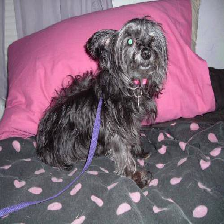

In [40]:
imagen = load_img(path_image, target_size=(224, 224))
imagen

In [27]:
imagen_array = img_to_array(imagen)
imagen_array

array([[[203., 164.,  87.],
        [206., 167.,  90.],
        [209., 170.,  93.],
        ...,
        [245., 203., 119.],
        [243., 202., 122.],
        [239., 200., 121.]],

       [[203., 164.,  87.],
        [206., 167.,  90.],
        [209., 170.,  93.],
        ...,
        [245., 205., 120.],
        [242., 204., 123.],
        [240., 201., 122.]],

       [[203., 164.,  87.],
        [206., 167.,  90.],
        [209., 170.,  93.],
        ...,
        [245., 204., 122.],
        [243., 205., 124.],
        [241., 202., 123.]],

       ...,

       [[154., 123.,  56.],
        [155., 124.,  57.],
        [156., 125.,  58.],
        ...,
        [  3.,   3.,   1.],
        [  3.,   3.,   1.],
        [  3.,   3.,   1.]],

       [[153., 122.,  55.],
        [153., 122.,  55.],
        [154., 123.,  56.],
        ...,
        [  2.,   2.,   0.],
        [  2.,   2.,   0.],
        [  2.,   2.,   0.]],

       [[151., 120.,  53.],
        [152., 121.,  54.],
        [153., 1

In [28]:
imagen_array = imagen_array / 255.0

In [29]:
imagen_array = imagen_array.reshape((1,) + imagen_array.shape)

In [30]:
print(imagen_array.shape)

(1, 224, 224, 3)
